In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import pmdarima as pm

In [3]:
df = pd.read_csv('/content/578080_PUBG.csv')
df

,Time,Sum of Playercount
0,12/14/2017,359489560
1,12/15/2017,411024096
2,12/16/2017,443528112
3,12/17/2017,417915489
4,12/18/2017,354798238
...,...,...
968,8/8/2020,62712578
969,8/9/2020,63468860
970,8/10/2020,55025198
971,8/11/2020,54134381


In [4]:
## Cleaning up the data
df.columns=["Day","Sum_Player"]
df.head()

,Day,Sum_Player
0,12/14/2017,359489560
1,12/15/2017,411024096
2,12/16/2017,443528112
3,12/17/2017,417915489
4,12/18/2017,354798238


In [5]:
# Convert Month into Datetime
df['Day']=pd.to_datetime(df['Day'])

In [6]:
df.set_index('Day',inplace=True)

<Axes: xlabel='Day'>

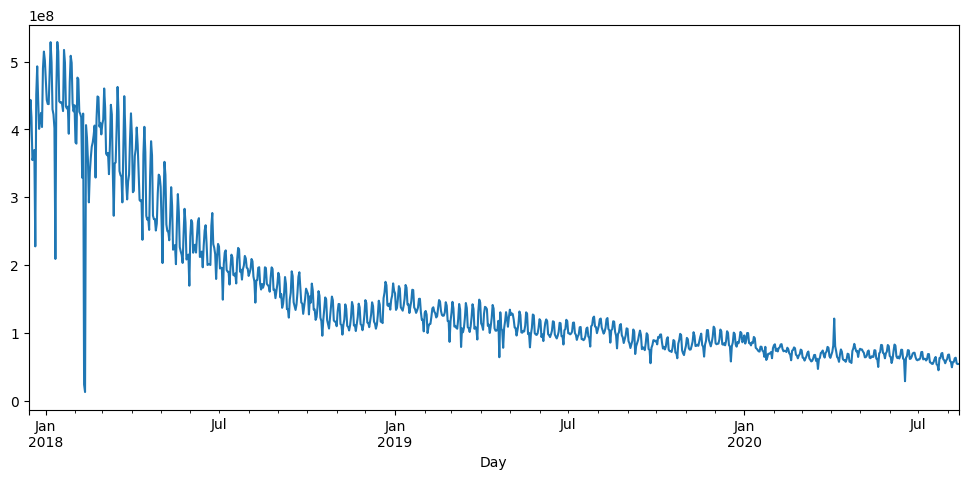

In [7]:
df['Sum_Player'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sum_Player'])

1. ADF :  -3.512020250770442
2. P-Value :  0.007683701906134031
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 952
5. Critical Values :
	 1% :  -3.437237626048241
	 5% :  -2.8645807475403657
	 10% :  -2.56838906578808


In [9]:
smodel = pm.auto_arima(df.Sum_Player, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=35894.954, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=36262.191, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=35970.057, Time=0.71 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=35971.446, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=36264.935, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=36120.016, Time=0.33 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=35896.214, Time=1.44 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=35896.950, Time=2.34 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=35964.679, Time=0.89 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=7.46 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=35894.898, Time=0.66 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=36145.910, Time=0.19 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=35896.540, Time=1.04 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=35896.839, Time=1.36 sec
 ARIMA(1,0,0)(1,1,2)[7] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  973
Model:             SARIMAX(3, 0, 3)x(1, 1, [1], 7)   Log Likelihood              -17831.432
Date:                             Tue, 03 Feb 2026   AIC                          35680.864
Time:                                     08:23:32   BIC                          35724.723
Sample:                                 12-14-2017   HQIC                         35697.562
                                      - 08-12-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1869      0.044     -4.220      0.000      -0.274      -0.100
ar.L2          0.8018      0.047     17.231      0.000       0.711       0.893
ar.L3          0.3539      0.034     10.293      0.000       0.286       0.421
ma.L1          0.7575      0.047     16.067      0.000       0.665       0.850
ma.L2         -0.5807      0.032    -18.198      0.000      -0.643      -0.518
ma.L3         -0.5941      0.032    -18.705      0.000      -0.656      -0.532
ar.S.L7        0.1482      0.023      6.445      0.000       0.103       0.193
ma.S.L7       -0.9249      0.020    -46.631      0.000      -0.964      -0.886
sigma2      7.908e+14   3.34e-17   2.37e+31      0.000    7.91e+14    7.91e+14
===================================================================================
Ljung-Box (L1) (Q):                   3.22   Jarque-Bera (JB):            707058.73
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -7.27
Prob(H) (two-sided):                  0.00   Kurtosis:                       134.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.31e+46. Standard errors may be unstable.
"""

In [10]:
predictions = smodel.predict_in_sample()

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing zeros in y_true with a small epsilon or handling them
    # For this dataset, values are large, so direct calculation should be fine.
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(df['Sum_Player'], predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.26%


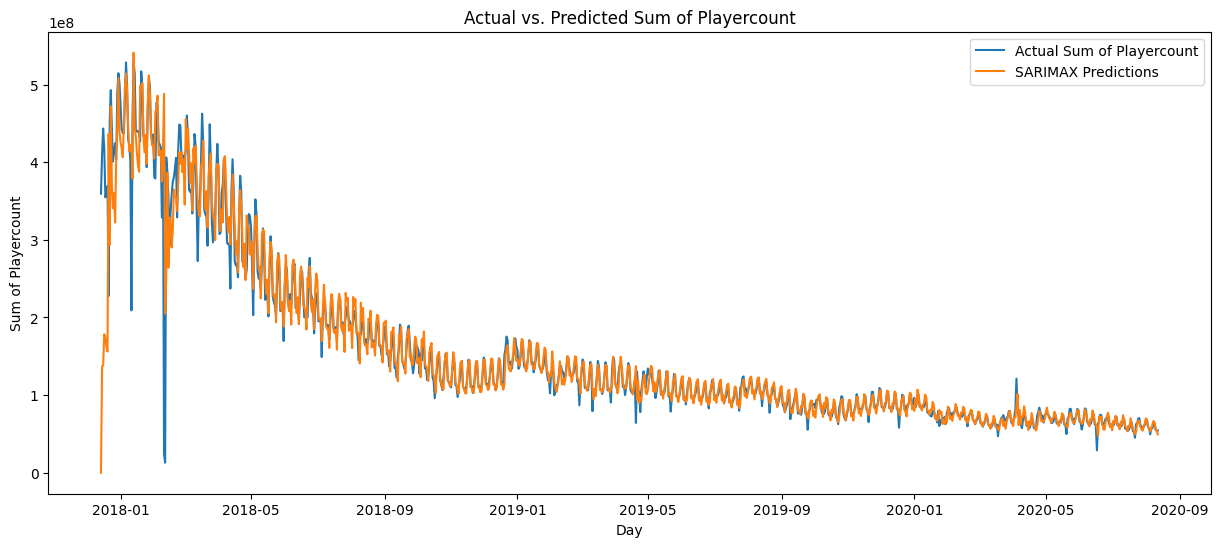

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df['Sum_Player'], label='Actual Sum of Playercount')
plt.plot(predictions, label='SARIMAX Predictions')
plt.title('Actual vs. Predicted Sum of Playercount')
plt.xlabel('Day')
plt.ylabel('Sum of Playercount')
plt.legend()
plt.show()